In [368]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, minmax_scale, OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN
import joblib 


We want to see what type of diabetic patients readmit less than 30 days

In [239]:
df = pd.read_csv('./data/diabetic_data.csv')
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [240]:
print(f'\nThe are {df.columns.shape[0]} features.')
print(f'\n {df.select_dtypes(include=['int64','float64','number']).shape[1]} numerical features.')
print(f'\n {df.select_dtypes(include=['object','category']).count().shape[0]} categorical features.\n')
df.info()


The are 50 features.

 13 numerical features.

 37 categorical features.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-nu

In [241]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [242]:
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [243]:
# Check the data in missing column
df['max_glu_serum'].unique()

array([nan, '>300', 'Norm', '>200'], dtype=object)

In [244]:
# Check the data in missing column
df['A1Cresult'].unique()

array([nan, '>7', '>8', 'Norm'], dtype=object)

In [245]:
# Check what would be the most frequnt value
df['A1Cresult'].mode()

0    >8
Name: A1Cresult, dtype: object

In [246]:
# Check what would be the most frequent value in this column
df['max_glu_serum'].mode()

0    Norm
Name: max_glu_serum, dtype: object

In [247]:
# Decided to go with 'Norm' for missing values
df.fillna(df['max_glu_serum'].mode()[0], inplace=True)

#Decided to go with more frequent value for missing data in this column
df.fillna(df['A1Cresult'].mode()[0], inplace=True)

# Check the missing values again
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

----------

## Feature Engineering

----------

In [248]:
# Figure out how to merge these columns in one
df['diag_1'].unique()
df['diag_2'].unique()
df['diag_3'].unique()


array(['?', '255', 'V27', '403', '250', 'V45', '38', '486', '996', '197',
       '250.6', '427', '627', '414', '416', '714', '428', '582', 'V43',
       '250.01', '263', '250.42', '276', '482', '401', '250.41', '585',
       '781', '278', '998', '568', '682', '618', '250.02', '305', '707',
       '496', '599', '715', '424', '518', '553', '794', '411', 'V42',
       '531', '511', '490', '562', '250.8', '250.7', '250.52', '784',
       '491', '581', '420', '8', '724', '730', '789', '131', '250.82',
       '999', '41', '493', '250.03', '753', '786', '529', 'E888', '425',
       '595', '303', '560', '711', '492', '332', '296', '438', '362',
       '250.4', '654', '244', 'V70', '737', '625', '681', '250.51', '404',
       'V10', '810', '280', '440', '785', '588', '569', '272', '997',
       '250.43', '918', '584', '54', '788', '426', '722', '250.92', '196',
       '461', '535', '787', '891', '284', '458', '648', '780', '182',
       '285', '593', '413', '664', '564', '201', '356', 'V15', '2

In [249]:
# To evaluate if we need to keep this feature or not
df['acetohexamide'].value_counts()

acetohexamide
No        101765
Steady         1
Name: count, dtype: int64

In [250]:
# To evaluate this feature
df['acetohexamide'].unique()

array(['No', 'Steady'], dtype=object)

In [251]:
# Another categorical conversion to numeric these three features to the most frequent usages the convert to numeric
df['diag_1'] = pd.to_numeric(df['diag_1'], errors='coerce')
df['diag_2'] = pd.to_numeric(df['diag_2'], errors='coerce')
df['diag_3'] = pd.to_numeric(df['diag_3'], errors='coerce')
df['diag_1'].unique(), df['diag_2'].unique(), df['diag_3'].unique()
df['diag_1'].isnull().sum(), df['diag_2'].isnull().sum(),df['diag_3'].isnull().sum()

df = df.dropna()
df.isnull().sum()


encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

## Features' distribusion

Here is the part I wasnted to see how is the distributions of each feature. I can decide if I need to remove the feature are they useful feature data or they can be removed.

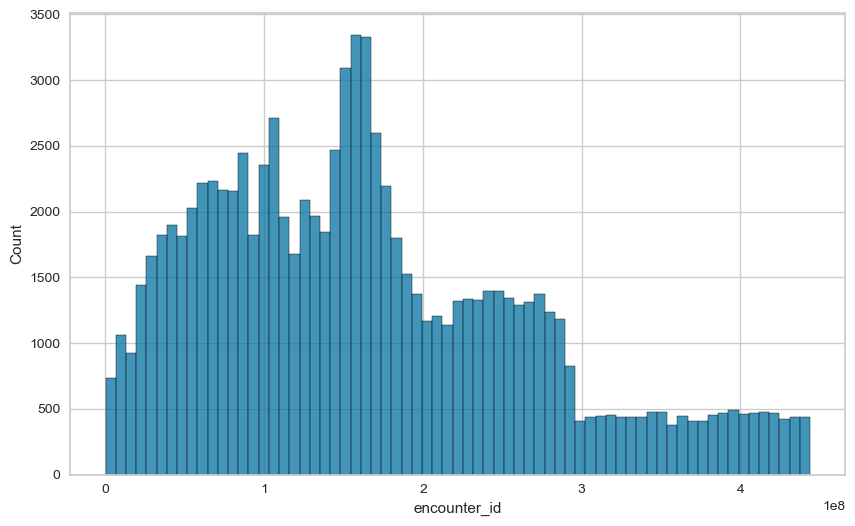

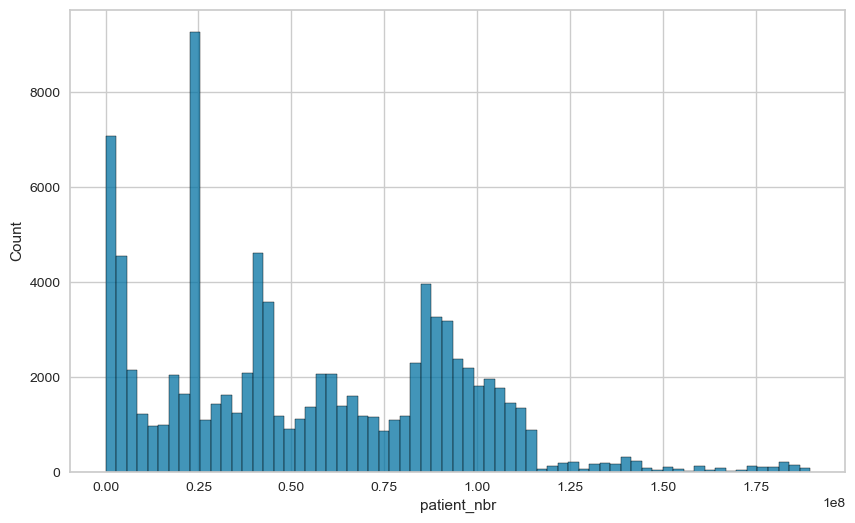

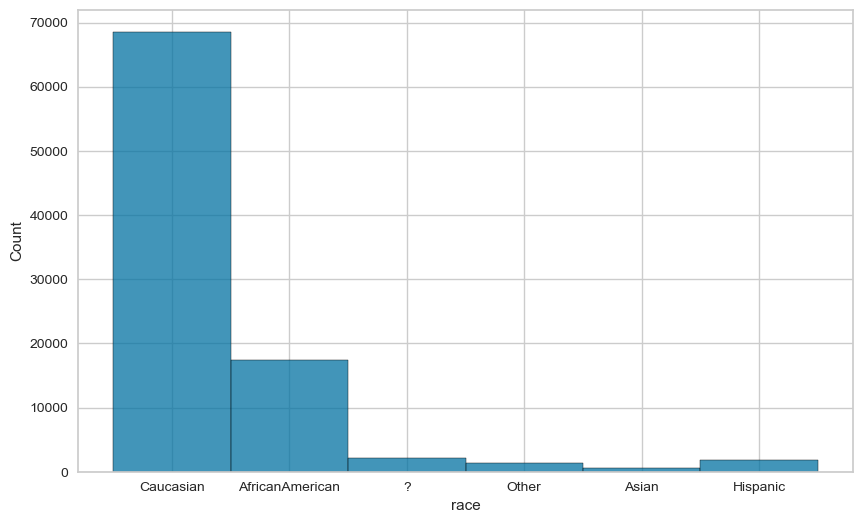

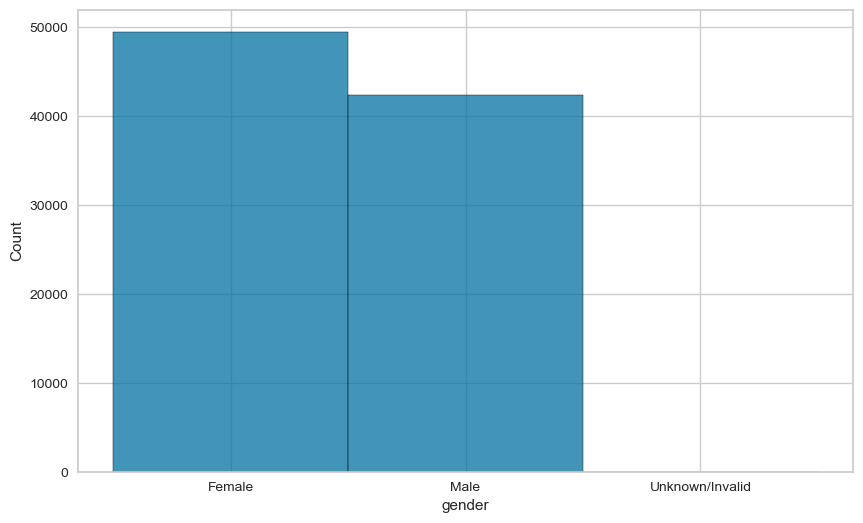

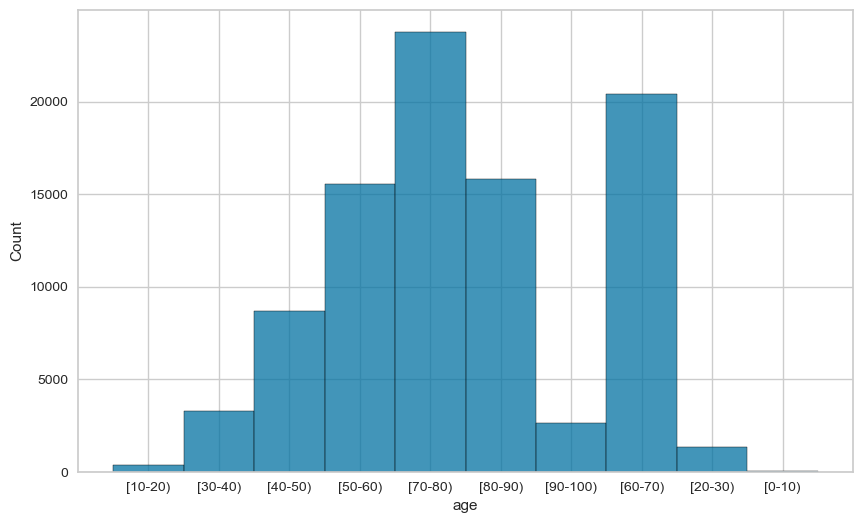

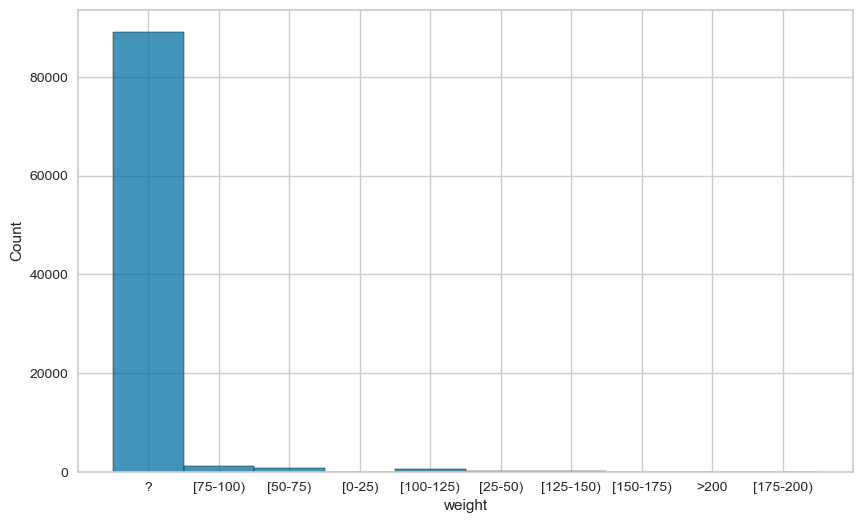

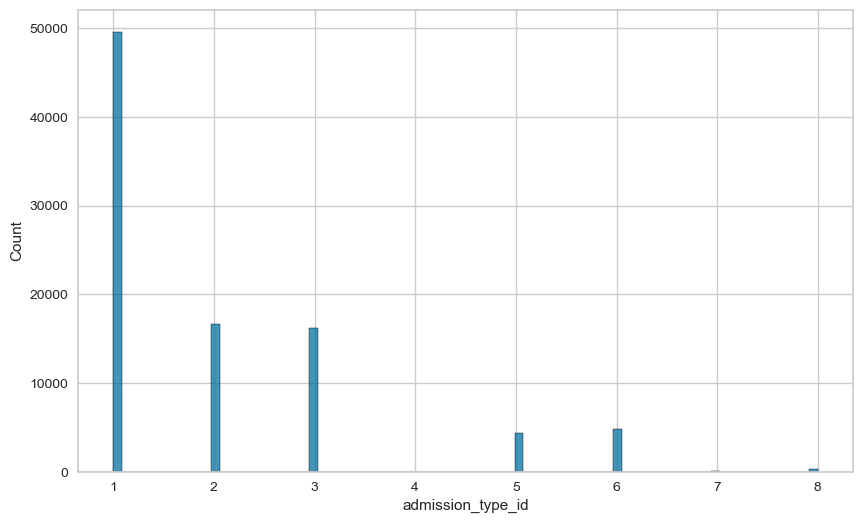

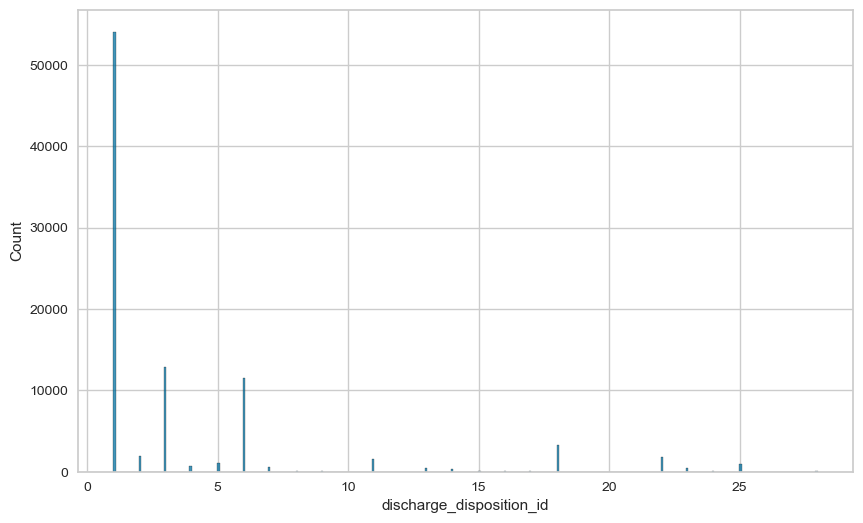

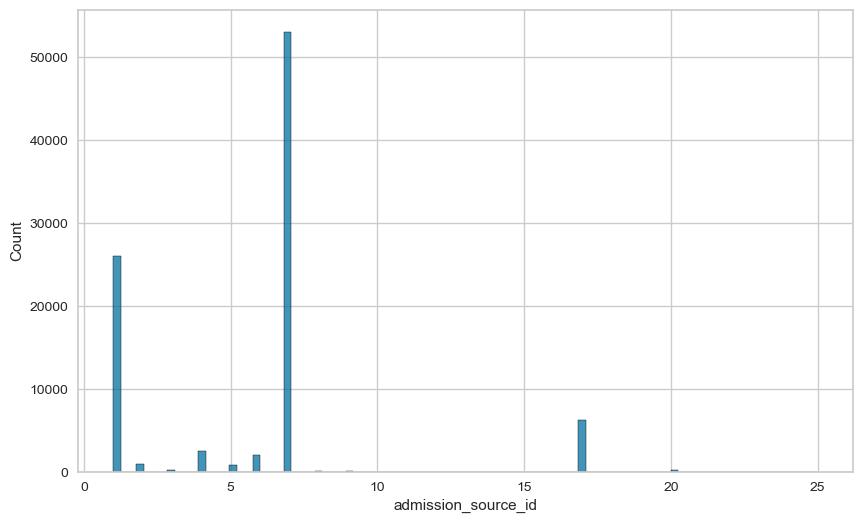

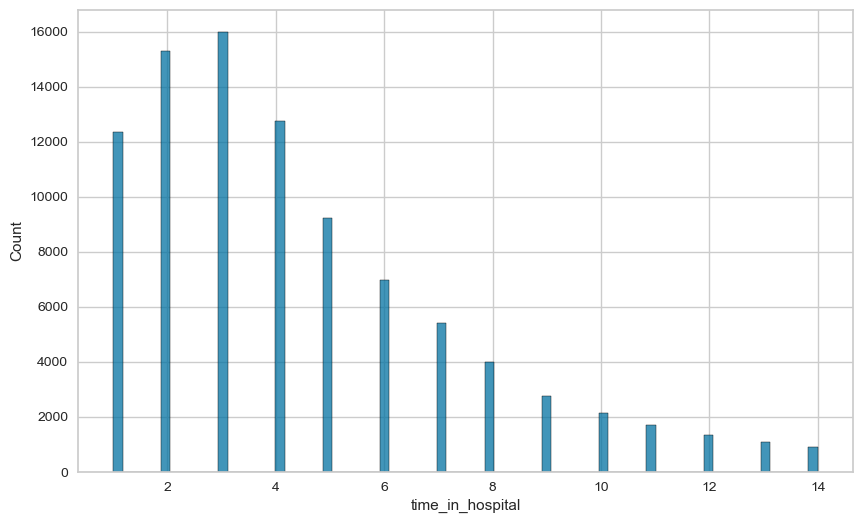

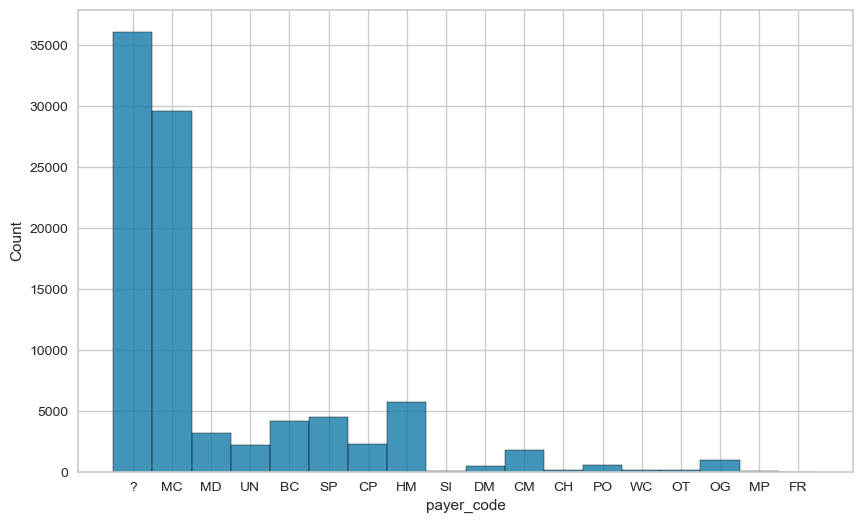

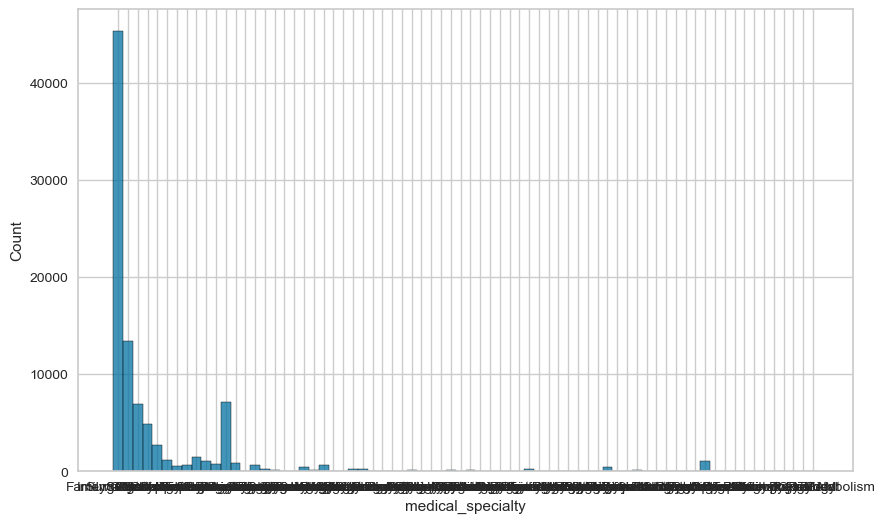

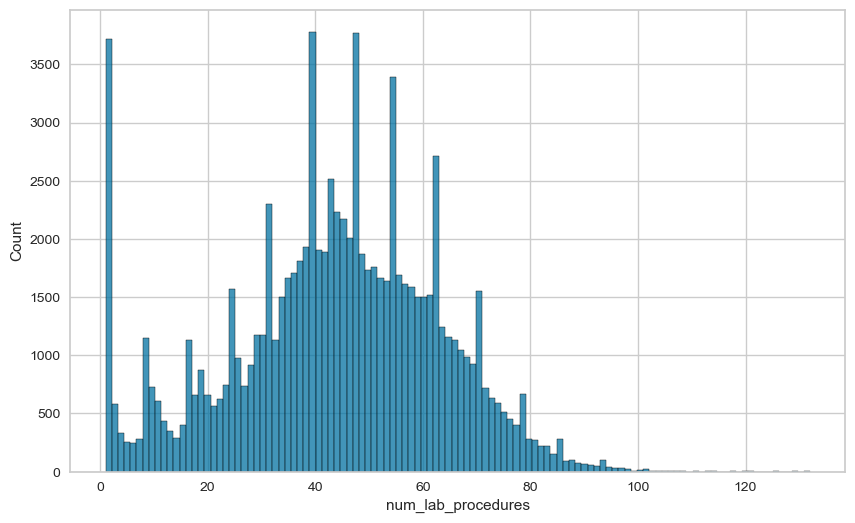

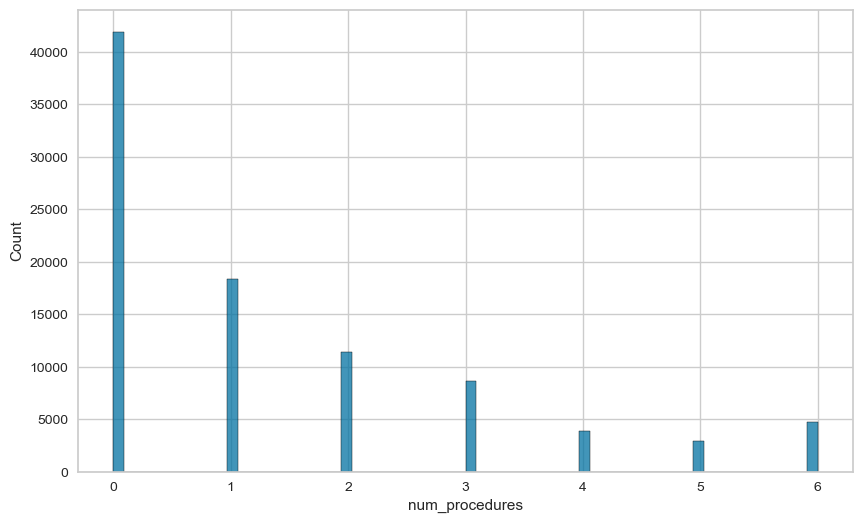

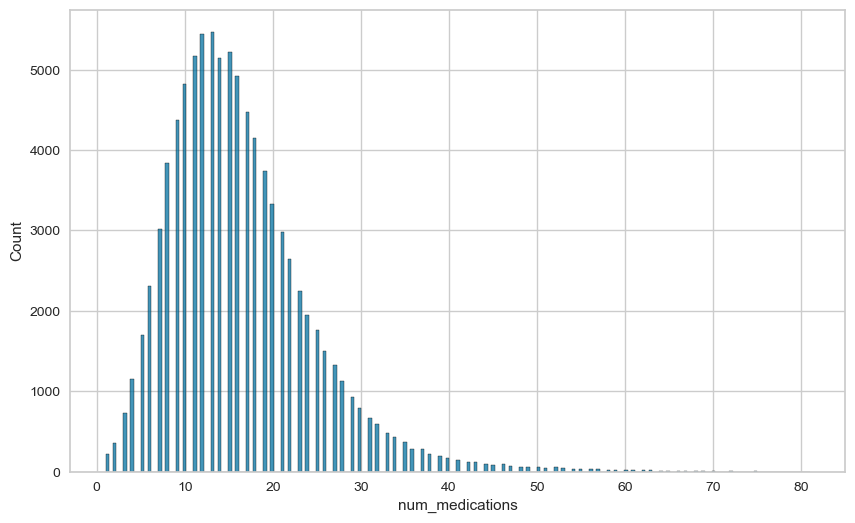

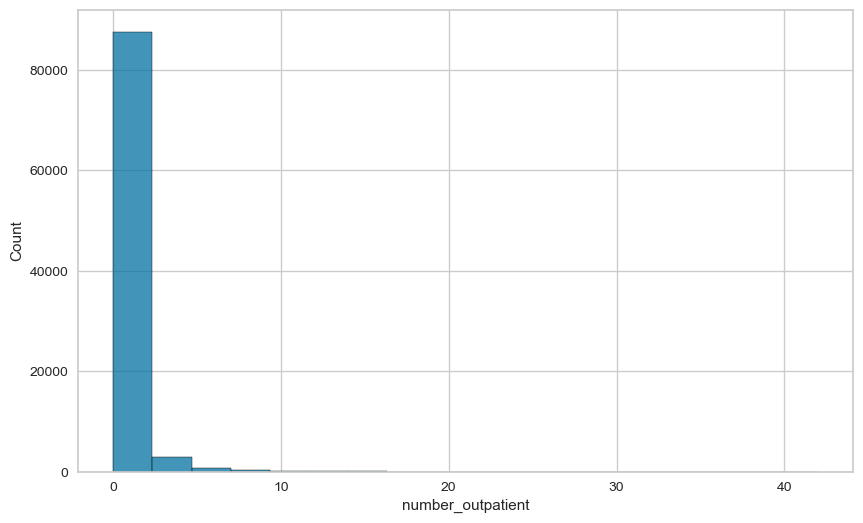

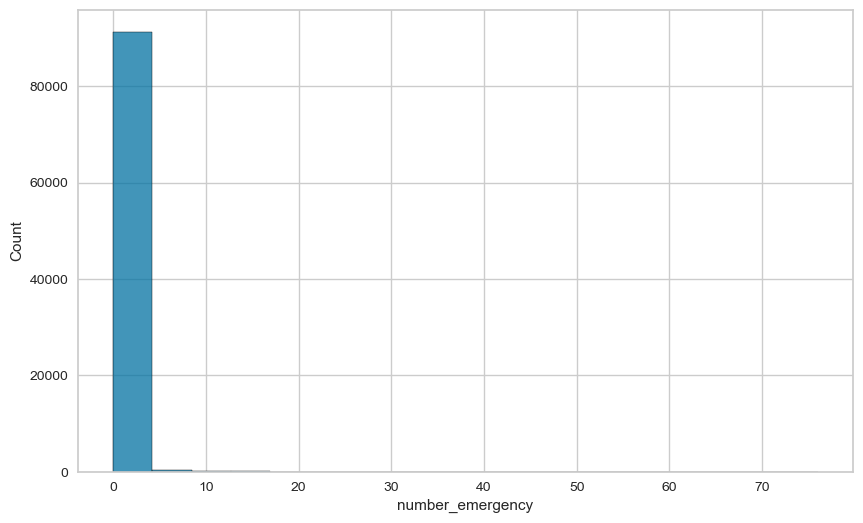

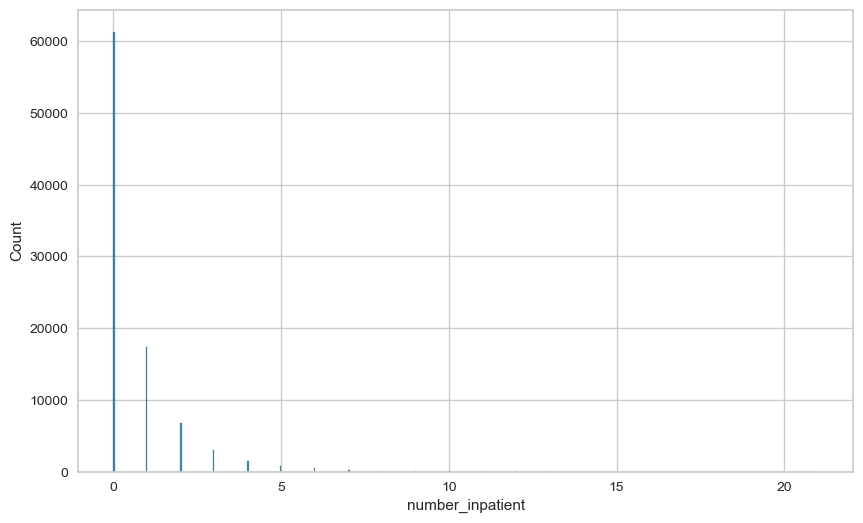

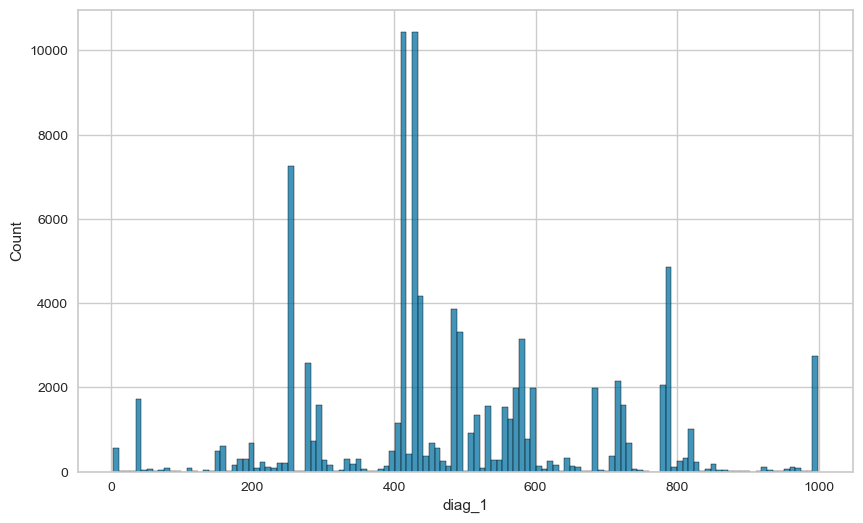

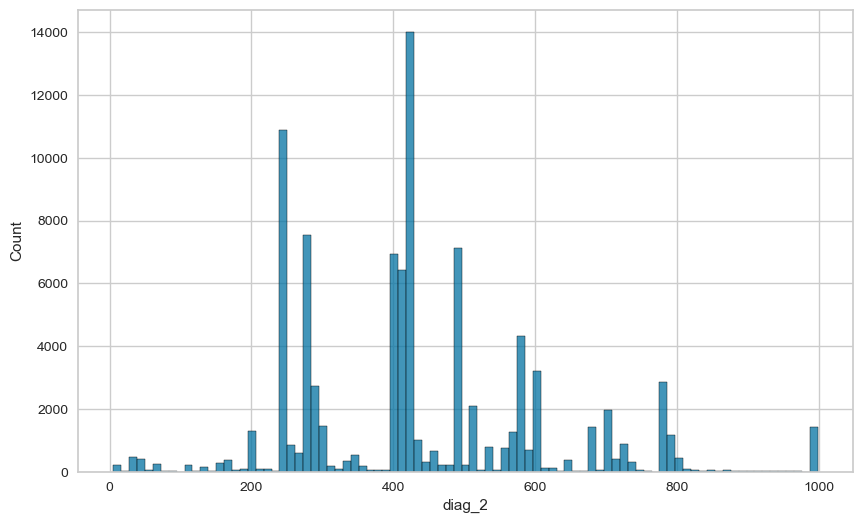

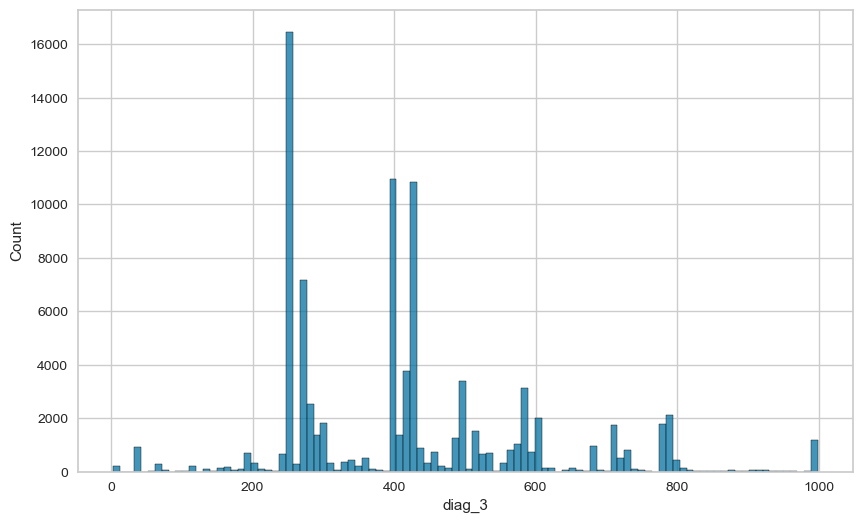

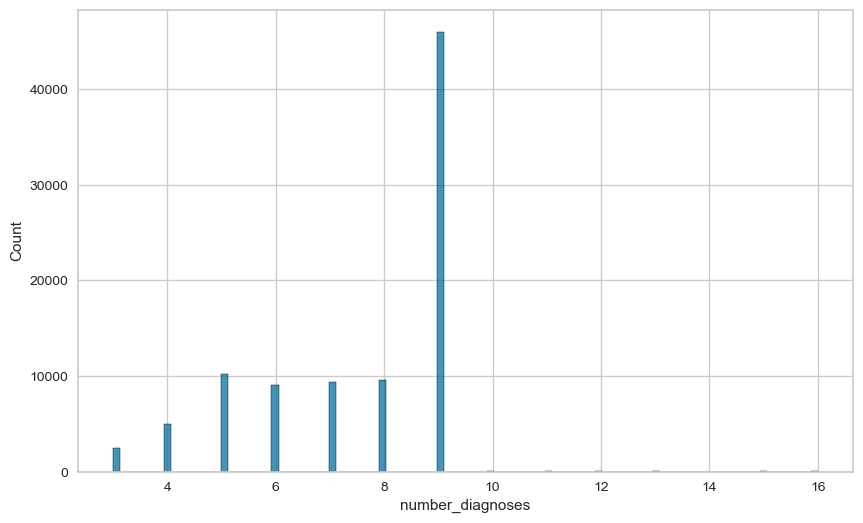

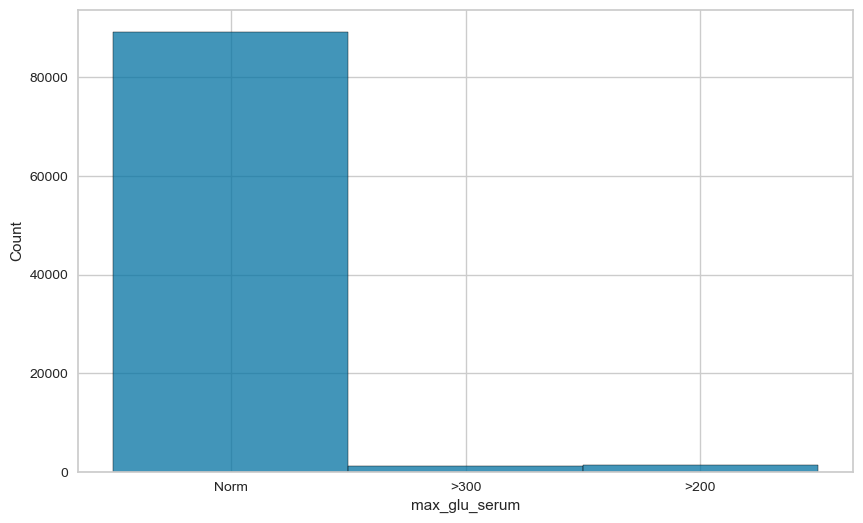

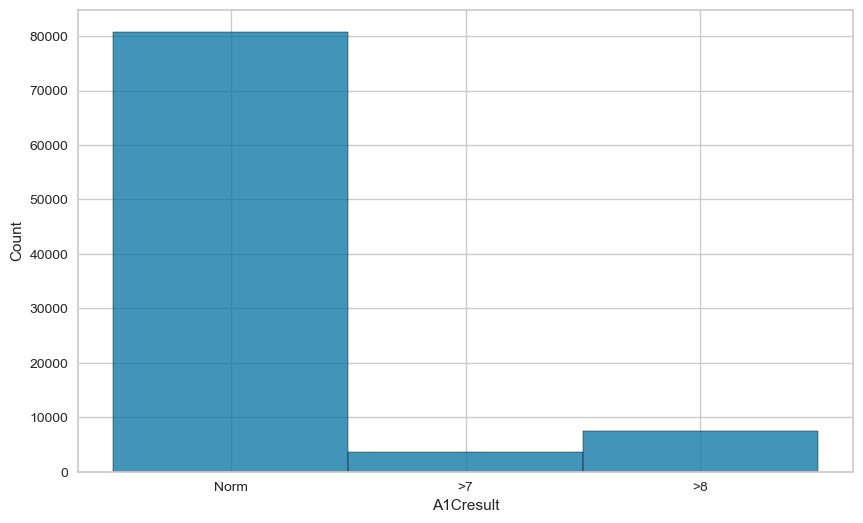

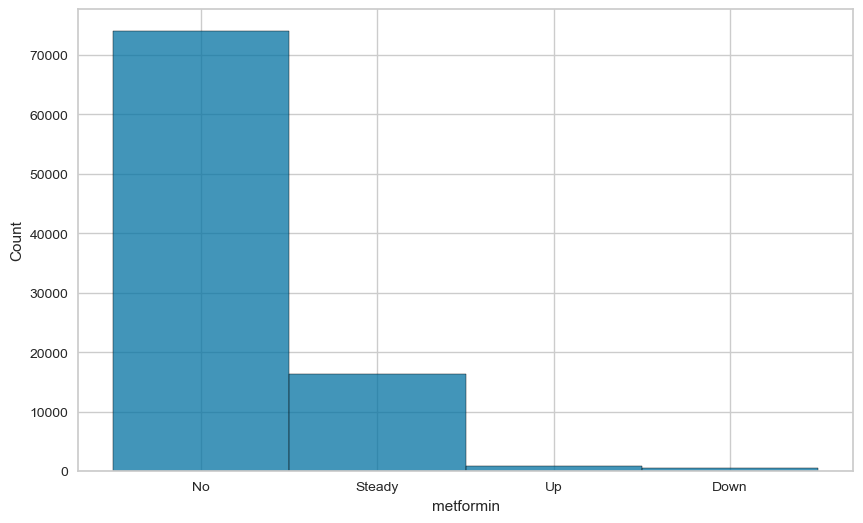

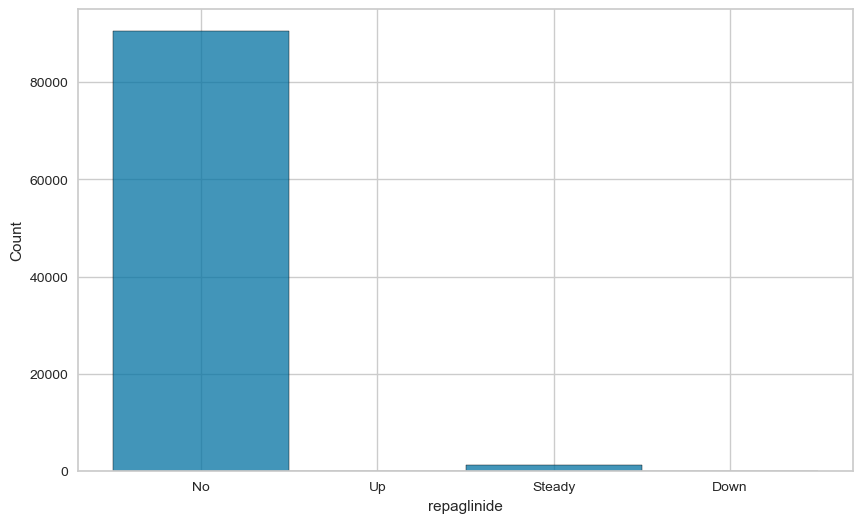

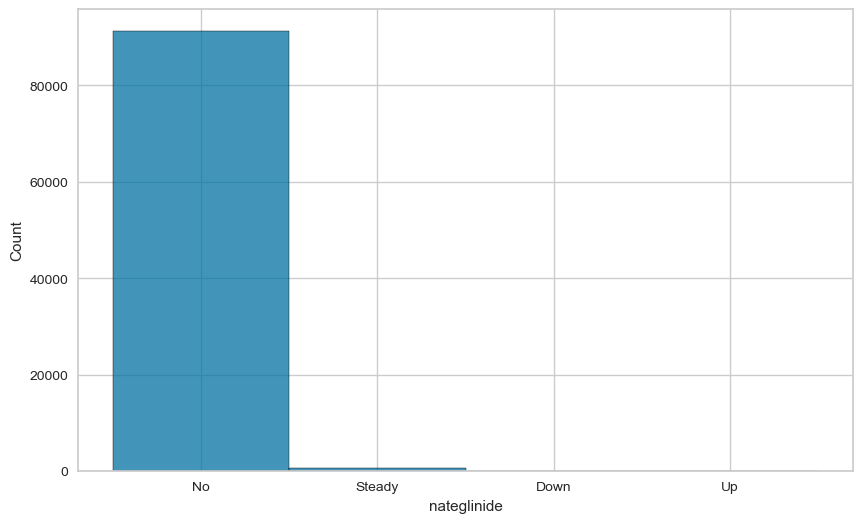

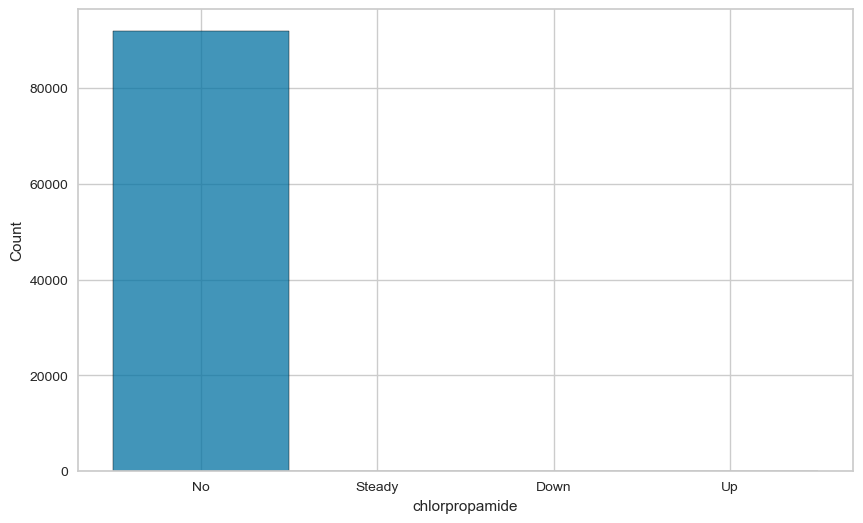

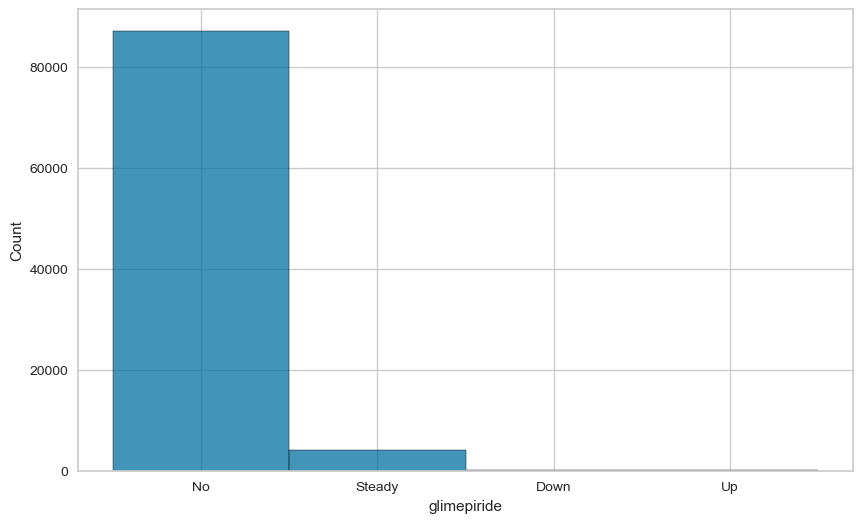

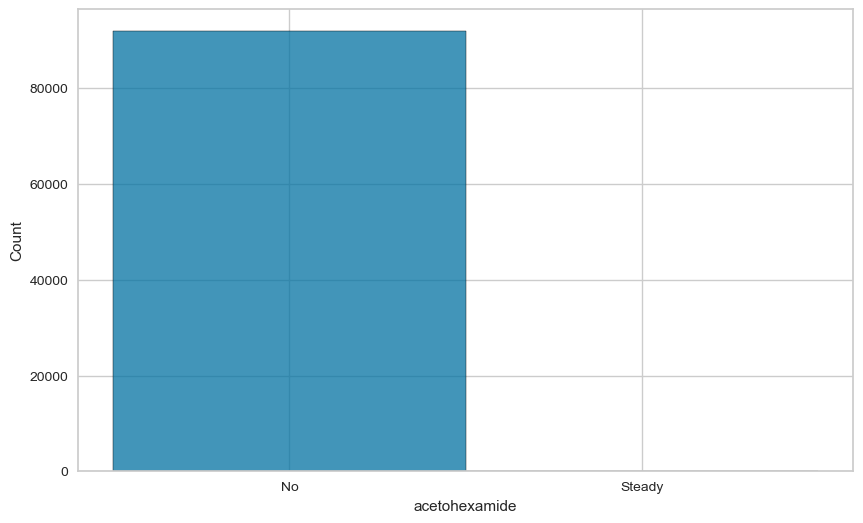

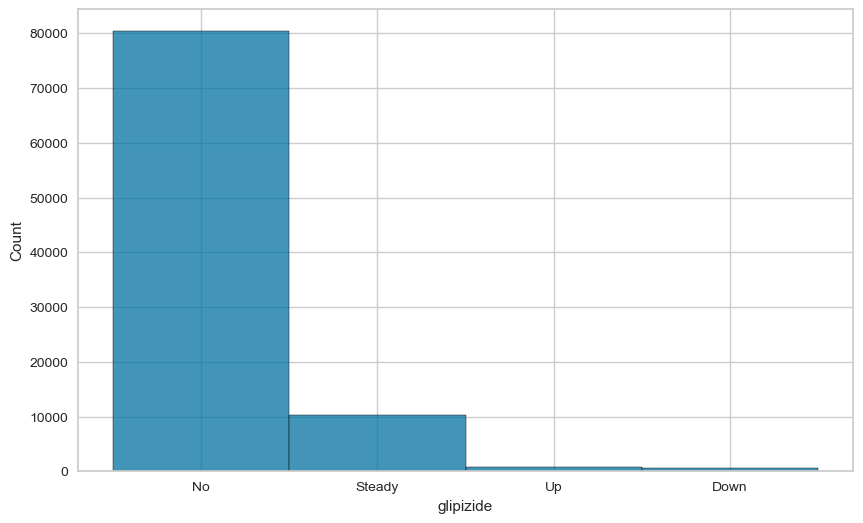

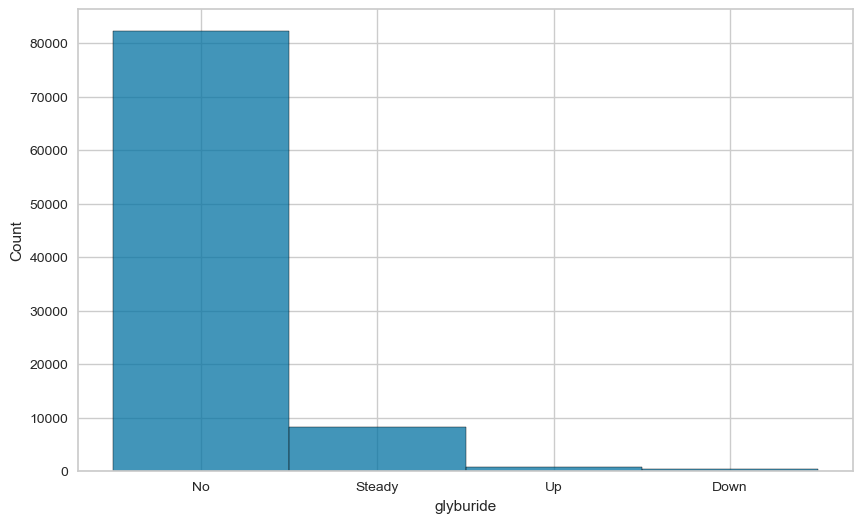

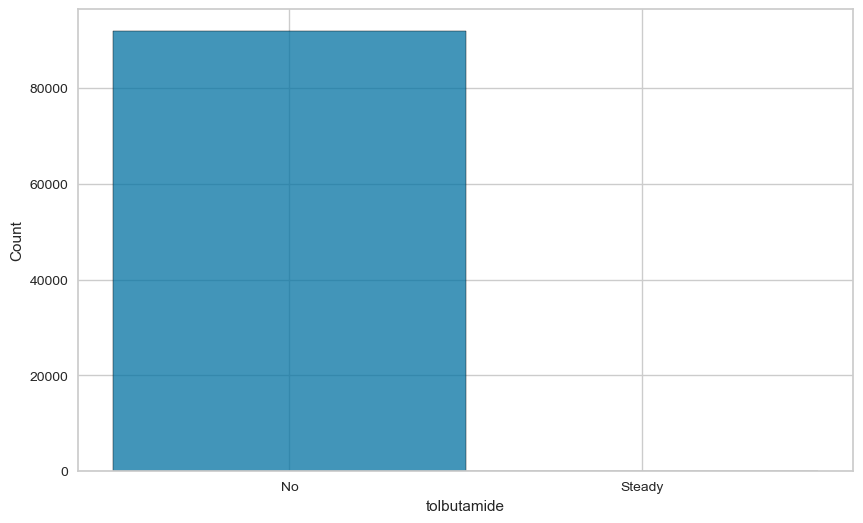

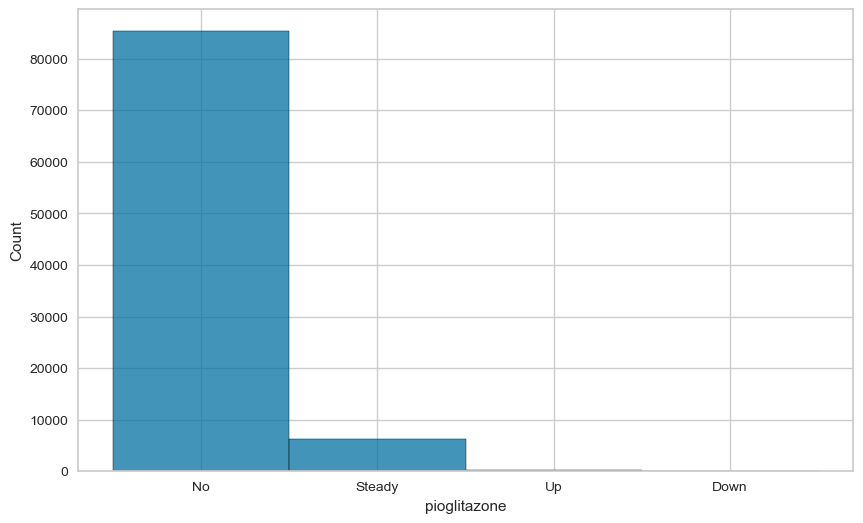

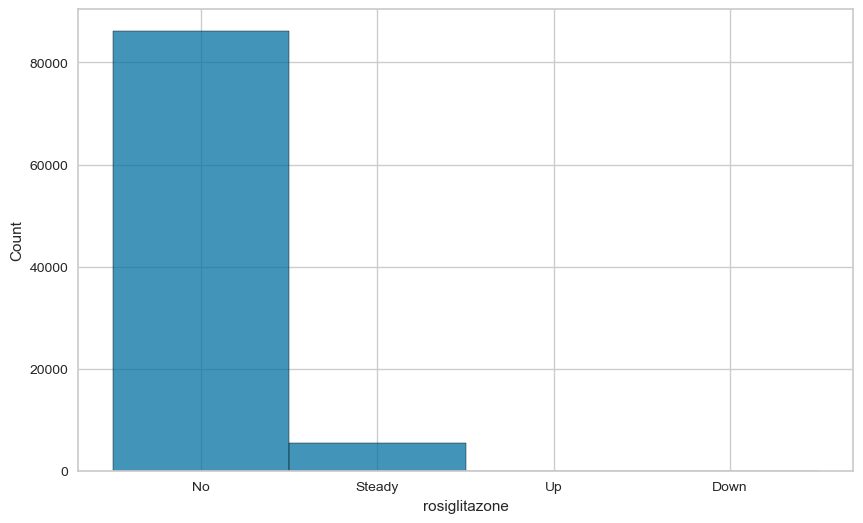

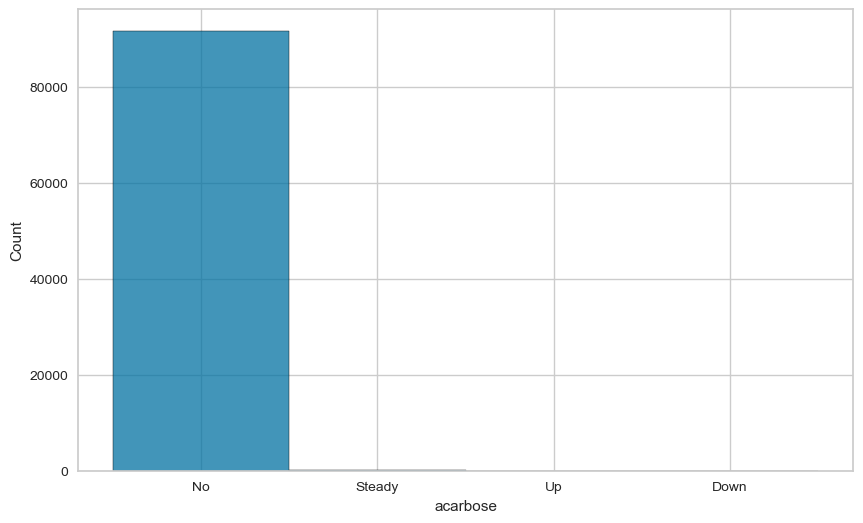

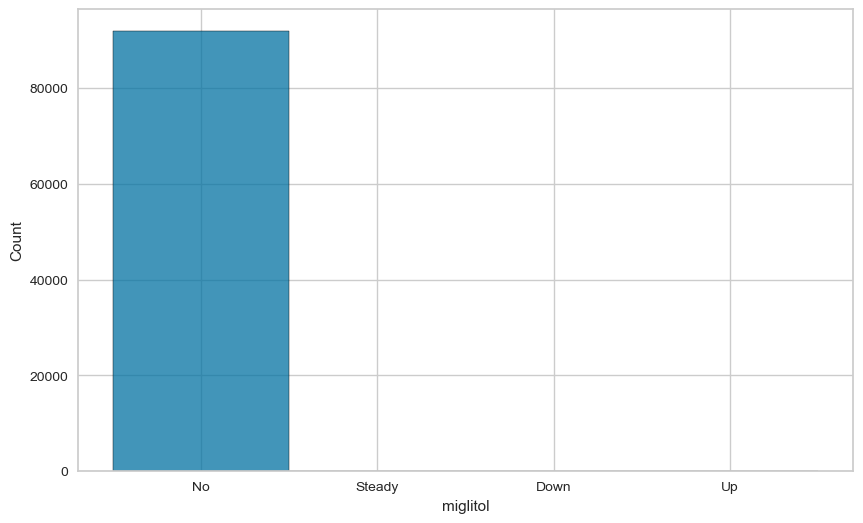

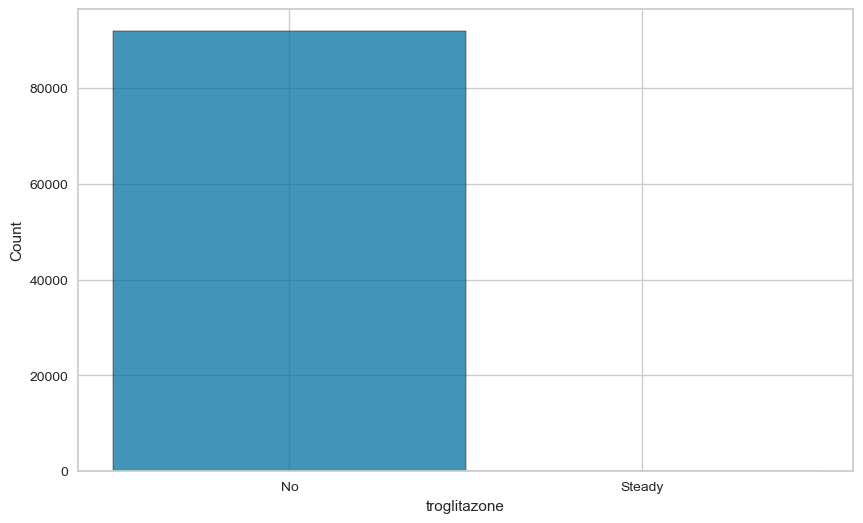

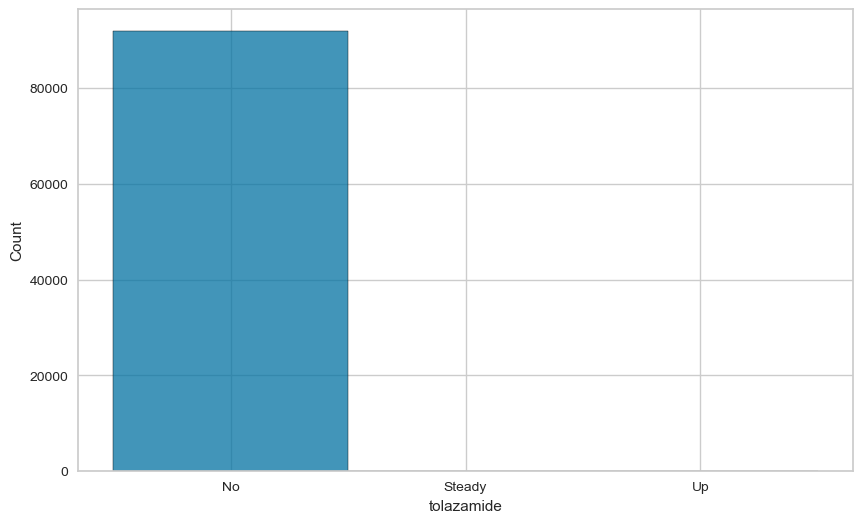

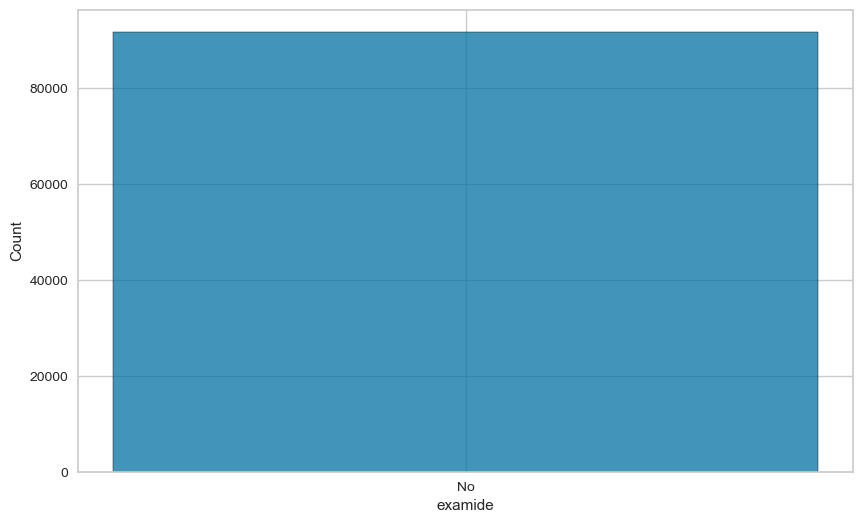

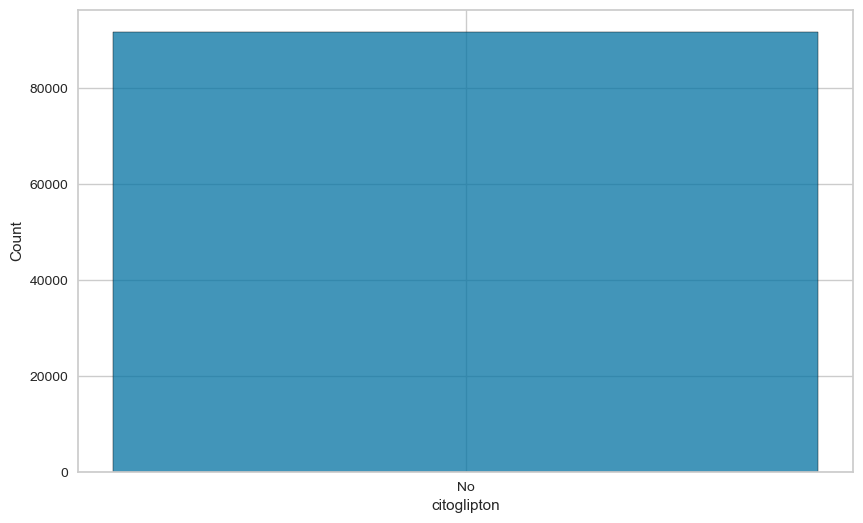

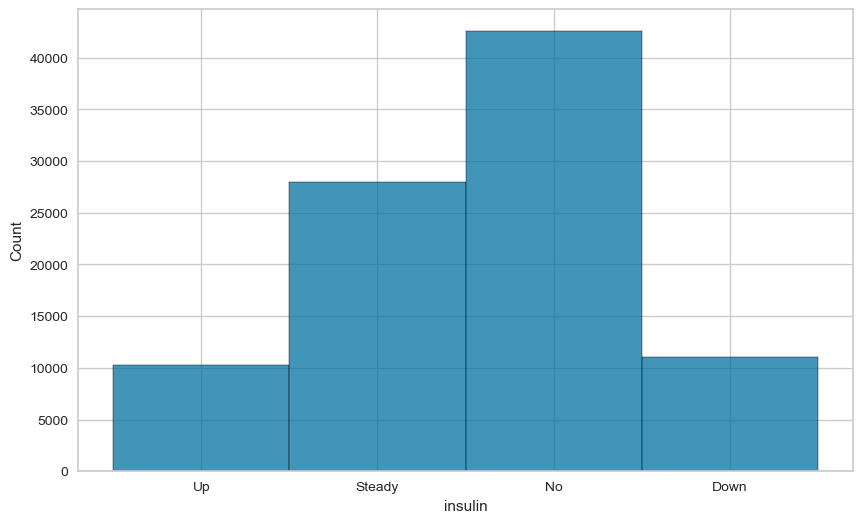

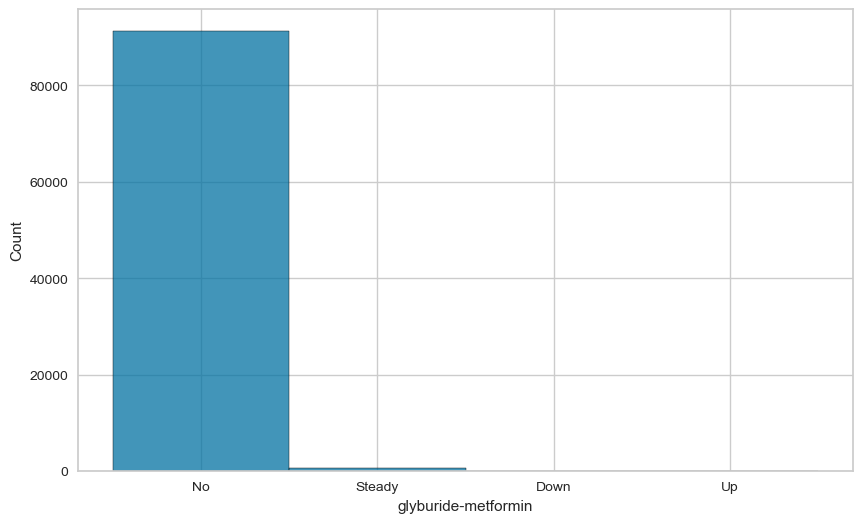

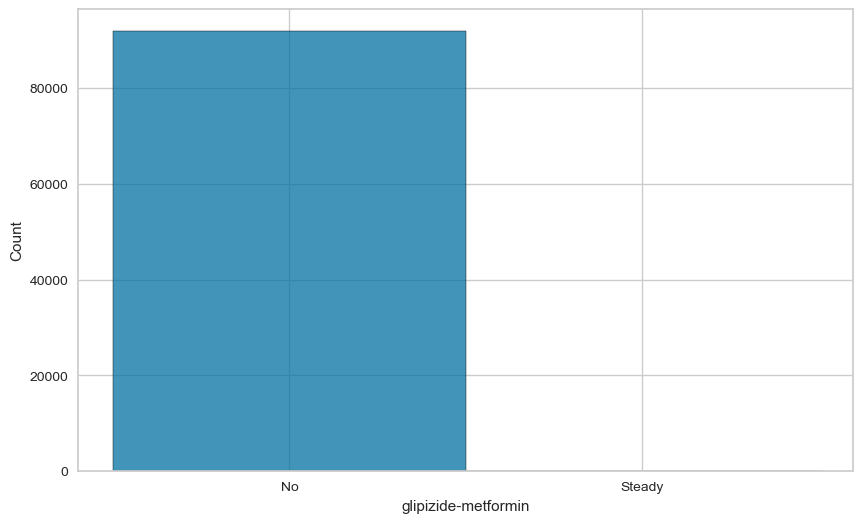

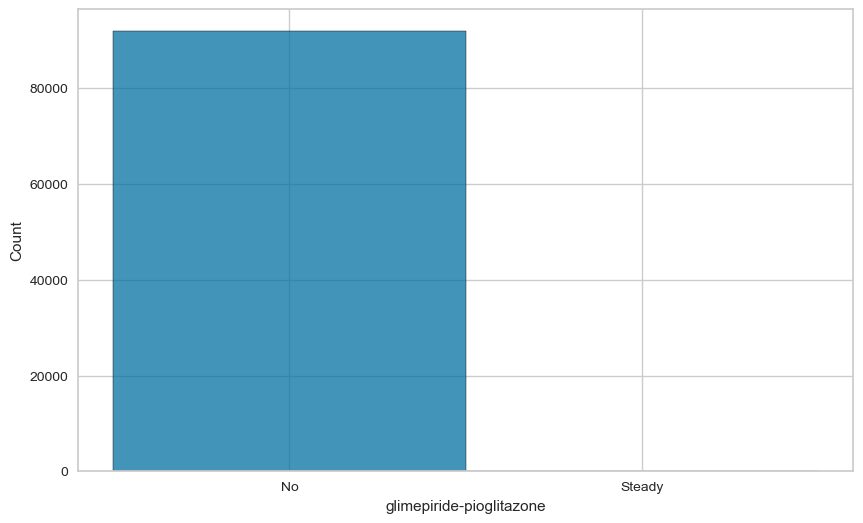

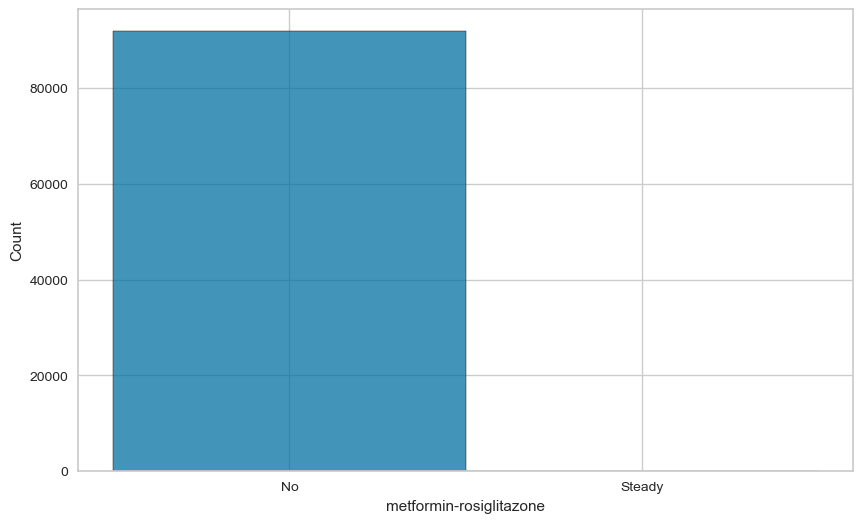

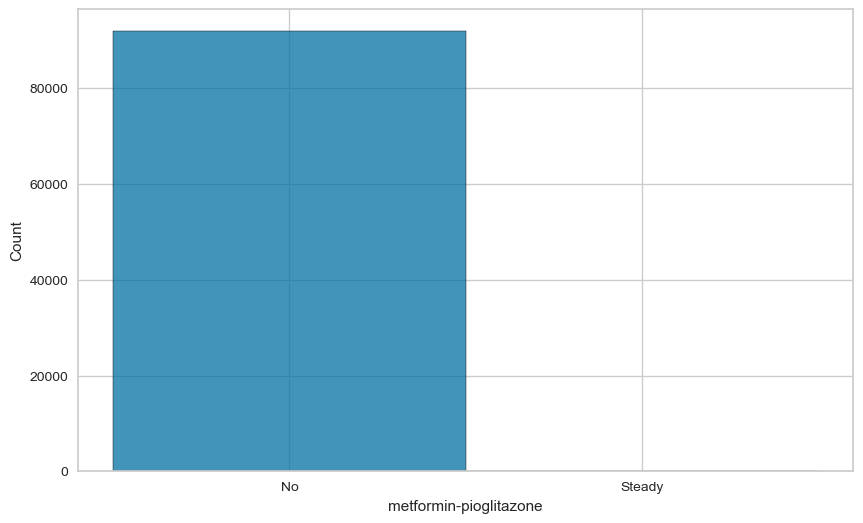

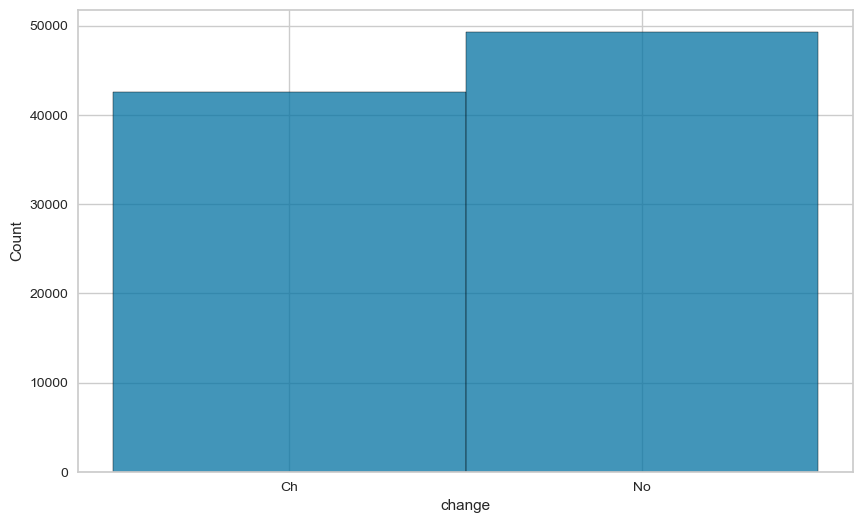

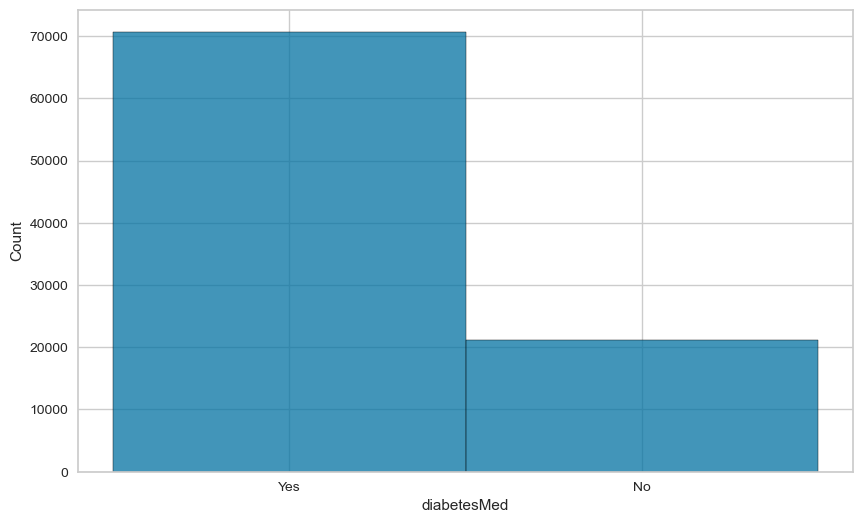

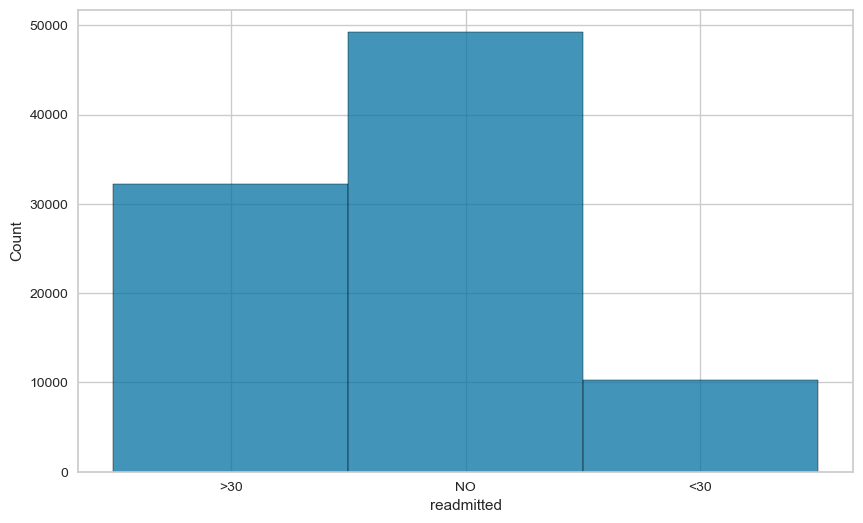

In [252]:
for col in df.columns:
    
    plt.figure(figsize=(10,6))
    sns.histplot(df[col])
    plt.show()

In [253]:
# These id features are irrelevant to 'readmitted' feature and they are not necessary to keep

df = df.drop(['encounter_id','patient_nbr', 'admission_type_id','discharge_disposition_id','admission_source_id'], axis=1)

# based on the distributions above I decided to remove these features 
df = df.drop(['payer_code','examide', 'citoglipton', 'glipizide-metformin', 'glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone','troglitazone','acetohexamide'], axis=1)


In [254]:
# I pass this to array to be able to check the column names quickly
np.array(df.columns)

array(['race', 'gender', 'age', 'weight', 'time_in_hospital',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'tolazamide', 'insulin',
       'glyburide-metformin', 'change', 'diabetesMed', 'readmitted'],
      dtype=object)

In [255]:
# I would drop this feature as it is not relevant to readmitted column and it has high cardinality
print(df['medical_specialty'].unique())
df = df.drop(['medical_specialty'], axis=1)


['?' 'InternalMedicine' 'Family/GeneralPractice' 'Cardiology'
 'Surgery-General' 'Orthopedics' 'Gastroenterology'
 'Surgery-Cardiovascular/Thoracic' 'Nephrology'
 'Orthopedics-Reconstructive' 'Psychiatry' 'Emergency/Trauma'
 'Pulmonology' 'Obsterics&Gynecology-GynecologicOnco'
 'ObstetricsandGynecology' 'Hematology/Oncology' 'Otolaryngology'
 'Pediatrics-Endocrinology' 'Surgery-Colon&Rectal' 'Surgery-Neuro'
 'Endocrinology' 'Urology' 'Psychiatry-Child/Adolescent'
 'Pediatrics-Pulmonology' 'Pediatrics' 'Neurology'
 'Anesthesiology-Pediatric' 'Radiology' 'Pediatrics-CriticalCare'
 'Pediatrics-Hematology-Oncology' 'Podiatry' 'Gynecology'
 'Pediatrics-Neurology' 'Surgery-Plastic' 'Surgery-Thoracic'
 'Surgery-PlasticwithinHeadandNeck' 'Psychology' 'Ophthalmology'
 'Surgery-Pediatric' 'InfectiousDiseases'
 'PhysicalMedicineandRehabilitation' 'Anesthesiology' 'Oncology'
 'Pediatrics-EmergencyMedicine' 'AllergyandImmunology'
 'Surgery-Maxillofacial' 'Pediatrics-InfectiousDiseases'
 'Pediatrics

In [256]:
# Drop missing or invalid values
df = df.replace('?', np.nan).dropna()

In [257]:
# Number of categorical columns to encode.
categorical_col.shape

(2560, 24)

In [258]:
# OneHoTEncoder

#Select categorical columns to apply encoder
categorical_col = df.select_dtypes(include=['object'])

# Encoder instance with oneHotEncoder I got 2541 features So, I tried OrdinalEncoder
# one_h_e = OneHotEncoder(sparse_output=False)
one_h_e = OrdinalEncoder()

# Fit the encoder to categorical features
df_encode = one_h_e.fit_transform(df[categorical_col.columns])

# Convert to data frame to have accessible format
df_encode = pd.DataFrame(df_encode,  columns = one_h_e.get_feature_names_out())

# See how big is the encoded data frame
df_encode.shape


(2560, 24)

In [259]:
# Join the categorical and numerical features and be prepared to fit the classification Model

# Select numerical columns (excluding target variable 'readmitted')
numerical_cols = [col for col in df.select_dtypes(include=['float64', 'int64', 'number']).columns if col != 'readmitted']

# Concatenate numerical and encoded categorical features
df_encoded_all = pd.concat([df_encode, df[numerical_cols].reset_index(drop=True)], axis=1)

# df_encoded_all.head(3)

In [260]:
# To get the idea of features' corrolations
df[numerical_cols].corr()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses
time_in_hospital,1.000000,0.338554,0.072777,0.493423,-0.051567,-0.012408,0.008300,-0.122419,0.044301,0.103350,0.215226
num_lab_procedures,0.338554,1.000000,0.007185,0.212841,-0.047086,0.035873,0.023730,-0.119626,-0.030603,0.052082,0.236868
num_procedures,0.072777,0.007185,1.000000,0.369580,-0.031431,-0.069434,-0.085592,-0.041069,0.049813,0.058926,-0.003698
num_medications,0.493423,0.212841,0.369580,1.000000,-0.002628,-0.013080,0.061136,-0.013488,0.073064,0.089377,0.218400
number_outpatient,-0.051567,-0.047086,-0.031431,-0.002628,1.000000,0.127199,0.091259,-0.034963,-0.003695,0.004431,0.085239
number_emergency,-0.012408,0.035873,-0.069434,-0.013080,0.127199,1.000000,0.303123,-0.029815,-0.013221,-0.003104,0.102960
number_inpatient,0.008300,0.023730,-0.085592,0.061136,0.091259,0.303123,1.000000,-0.052888,-0.011971,-0.004846,0.124213
diag_1,-0.122419,-0.119626,-0.041069,-0.013488,-0.034963,-0.029815,-0.052888,1.000000,-0.003547,-0.039671,0.016801
diag_2,0.044301,-0.030603,0.049813,0.073064,-0.003695,-0.013221,-0.011971,-0.003547,1.000000,0.069993,0.159542
diag_3,0.103350,0.052082,0.058926,0.089377,0.004431,-0.003104,-0.004846,-0.039671,0.069993,1.000000,0.161550


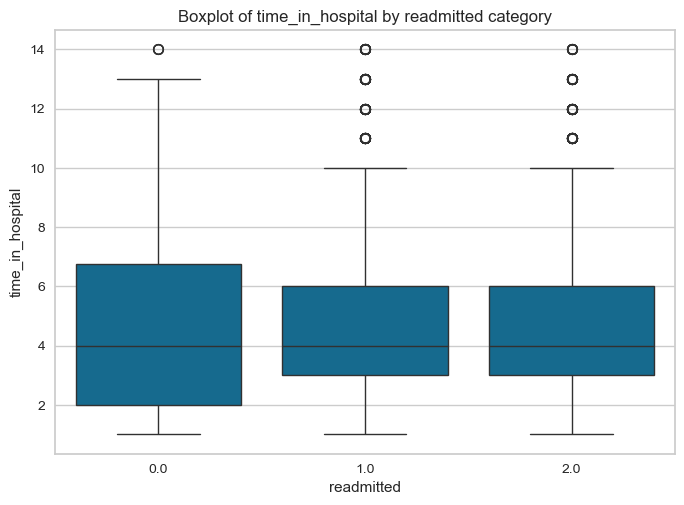

In [261]:
# Plotting outliers I might eliminate them if the clustering didn't go well.
sns.boxplot(data=df_encoded_all, x='readmitted', y='time_in_hospital')
plt.title("Boxplot of time_in_hospital by readmitted category")
plt.show()

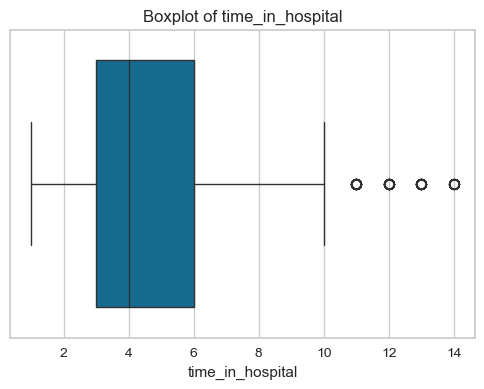

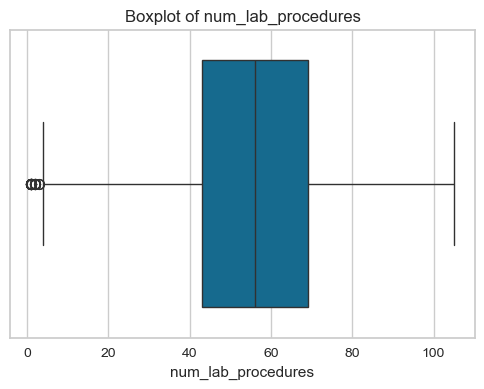

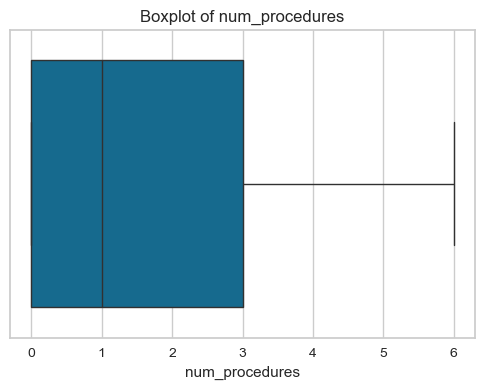

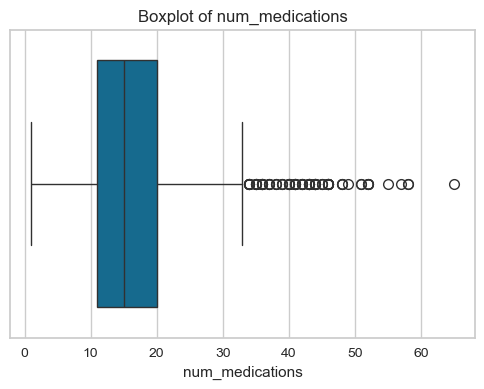

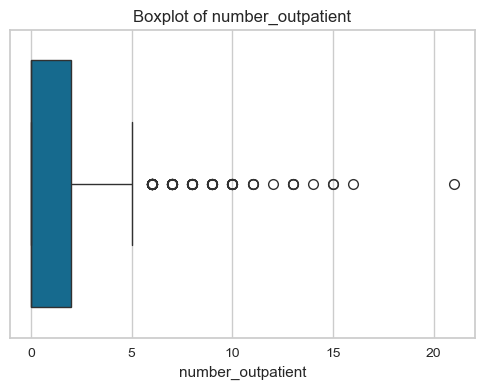

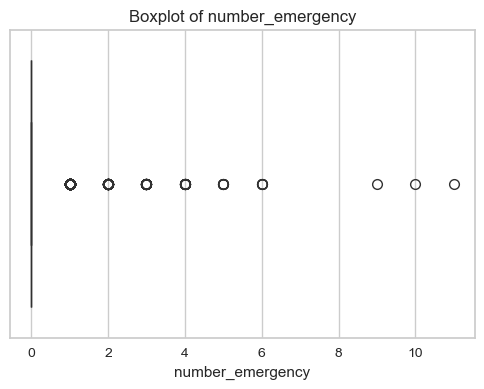

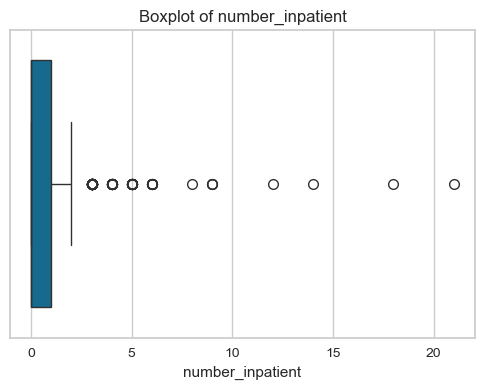

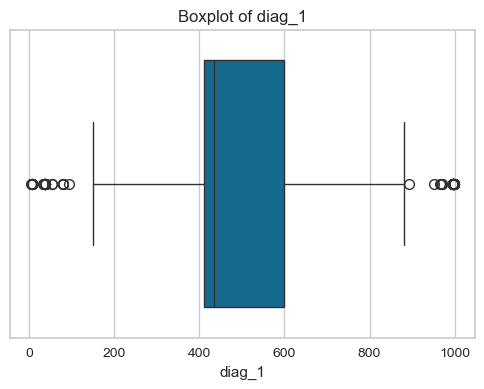

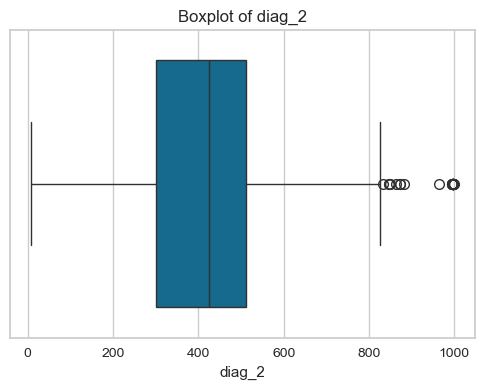

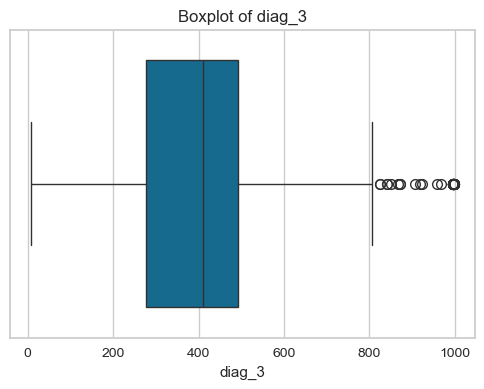

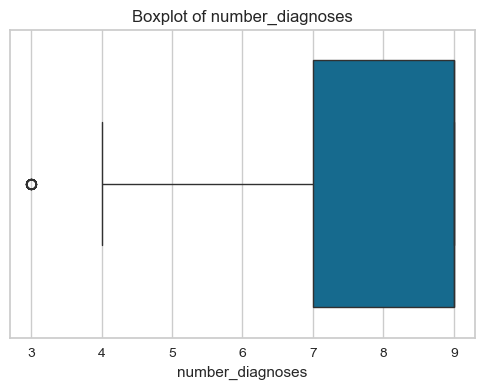

In [262]:
# I wanted to see how is the outliers in each feature
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot of {col}")
    plt.show()

<Figure size 1500x900 with 0 Axes>

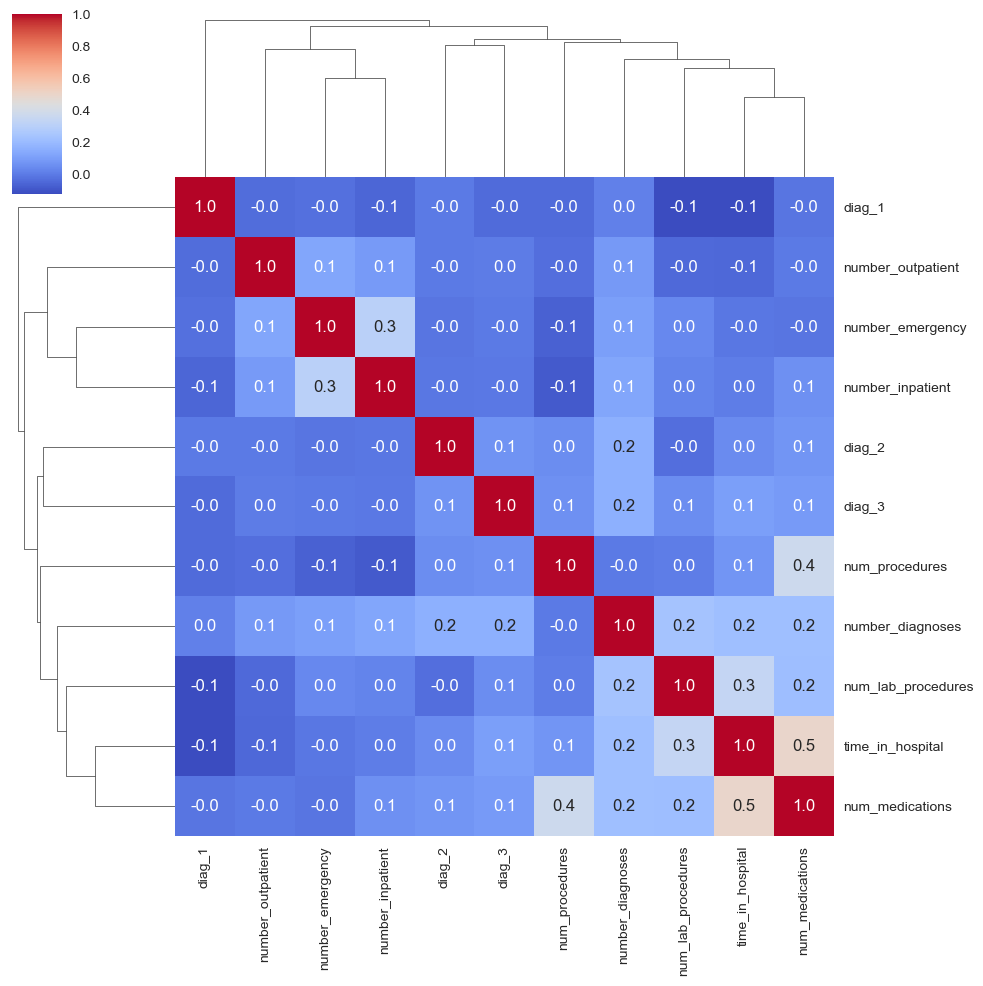

In [166]:
# Clustering map between the numerical columns
plt.figure(figsize=(15,9))
# numeric_categoric =[]
sns.clustermap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt= '.1f')

In the clustering map above we see higher connections/correlations between num_procedures/num_medications or time_in_hospital/num_medications, number_inpatient/number_ inpatient also looks like the clustering numbers can go upto 8 or higher based on the line crossing the higher clustering lines on left side.


In [309]:
#Standar scaling of the data values
# Create instance of Standard Scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded_all)
X_scaled

array([[ 0.16141991,  1.01813313, -0.81426949, ..., -1.09072826,
        -0.0993725 , -1.4041162 ],
       [ 0.16141991, -0.98218983, -0.15502537, ...,  3.27217638,
        -0.77913089, -0.70750041],
       [ 0.16141991, -0.98218983, -1.47351361, ..., -1.89564916,
         1.18396446, -2.10073199],
       ...,
       [ 0.16141991, -0.98218983,  0.50421874, ...,  0.43162216,
        -0.83187076,  0.68573117],
       [ 0.16141991,  1.01813313,  0.50421874, ..., -0.93907649,
        -0.9842304 , -2.10073199],
       [ 0.16141991,  1.01813313, -0.15502537, ..., -1.09072826,
        -0.0993725 , -0.70750041]])

In [353]:
# Apply DBSCAN we can also find outliers
# Loop for eps values

outliers = []

#Initialize epsilon values
epsilon = np.linspace(0.001,3,50)

#set minimum samples
min_sample = 2 * len(df_encoded_all.columns)

# Forloop to create variety of models testing different epsilons
for eps in epsilon:
    dbscan_model = DBSCAN(eps=eps, min_samples= min_sample)
   

    # Fit the model
    dbscan_model.fit(X_scaled)
  
    #silouette Score is not calculable as we only have 1 cluster 
    # dbscan_score = silhouette_score(X_scaled, dbscan_model.labels_)
    # print(f'dbscan_silhouette_score with epsilon = {eps} is {dbscan_score}' )
    
    # Find amount of outliers label -1: noise, label 0,1 cluster
    count_out = np.count_nonzero(dbscan_model.labels_ == -1)

    # Save to outliers array
    outliers.append(count_out)

print(f'number of outliers detected by DBSCAN model: {len(outliers)}')
np.array(outliers)

number of outliers detected by DBSCAN model: 50


array([2560, 2560, 2560, 2560, 2560, 2560, 2560, 2560, 2560, 2560, 2560,
       2560, 2560, 2560, 2560, 2560, 2560, 2560, 2560, 2560, 2560, 2560,
       2560, 2560, 2560, 2560, 2560, 2560, 2560, 2560, 2560, 2560, 2560,
       2560, 2560, 2560, 2560, 2560, 2560, 2560, 2560, 2560, 2484, 2392,
       2374, 2325, 2295, 2229, 2179, 2131])

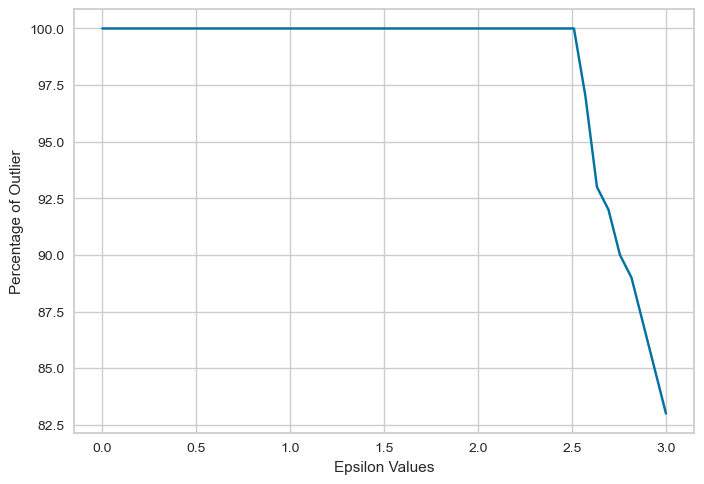

In [354]:
# Outlier points vs. eps value lineplot
# convert the outlier array to dataframe
outliers_df = pd.DataFrame(outliers)

# Name the columns of Dataframe
outliers_df.columns = ['Outlier']

#Calculate the percentage of the outlier
outliers_df['Perc_outlier'] = ((outliers_df['Outlier'] / len(df)) *100).astype(int)
ax = sns.lineplot(data=outliers_df, x=epsilon, y='Perc_outlier')
ax.set_xlabel('Epsilon Values')
ax.set_ylabel('Percentage of Outlier')
plt.savefig('DBSCAN_eps_plot.png', dpi=300, bbox_inches='tight')


The best epsilon is 2.5 as the percentage of outliers starts to drop.

In [355]:
# Remove outliers before applying Kmean

dbscan_labels = dbscan_model.labels_

# Remove outliers (DBSCAN labels outliers as -1)
X_cleaned = X_scaled[dbscan_labels != -1]
X_cleaned

array([[ 0.16141991, -0.98218983, -0.81426949, ..., -0.88658165,
        -0.83187076, -0.70750041],
       [ 0.16141991, -0.98218983,  1.16346286, ..., -0.15165386,
         1.02574483, -0.70750041],
       [ 0.16141991, -0.98218983,  1.16346286, ..., -1.09072826,
        -1.01939032, -0.70750041],
       ...,
       [ 0.16141991,  1.01813313,  1.16346286, ...,  0.28580315,
         0.2815266 ,  0.68573117],
       [ 0.16141991, -0.98218983,  1.16346286, ..., -1.39986455,
        -1.28894968,  0.68573117],
       [ 0.16141991, -0.98218983, -0.81426949, ..., -1.09072826,
        -0.0993725 , -0.01088462]])

In [356]:
# Size of the data without outliers
print(X_scaled.shape)

# In DBScan model is only one cluster and -1 is outliers, probably epsilon is too big
set(dbscan_model.labels_)  

(2560, 35)


{-1, 0}

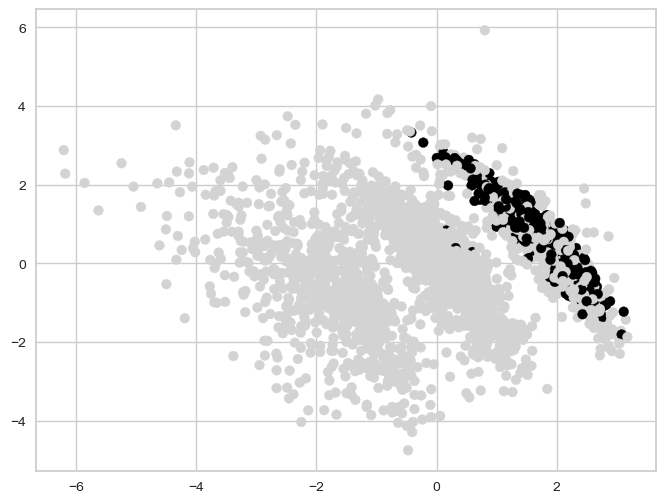

In [363]:
plt.figure(figsize=(8,6))
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

dbscan_colors = np.array(['lightgrey']*len(dbscan_labels))  # default color for outliers
valid_clusters = dbscan_labels != -1
valid_clusters
dbscan_colors[valid_clusters] = dbscan_labels[valid_clusters]
dbscan_colors[valid_clusters]
dbscan_labels[0]
plt.scatter(X_pca[:,0], X_pca[:,1], c=dbscan_colors)
# plt.title("DBSCAN Clusters (PCA-reduced data)")
# plt.colorbar(label="Cluster / -1 for outliers")
# plt.savefig('DBSCAN_plot.png', dpi=300, bbox_inches='tight')
# plt.show()

C:\Users\Masoum Saberi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Masoum Saberi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Masoum Saberi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Masoum Saberi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known

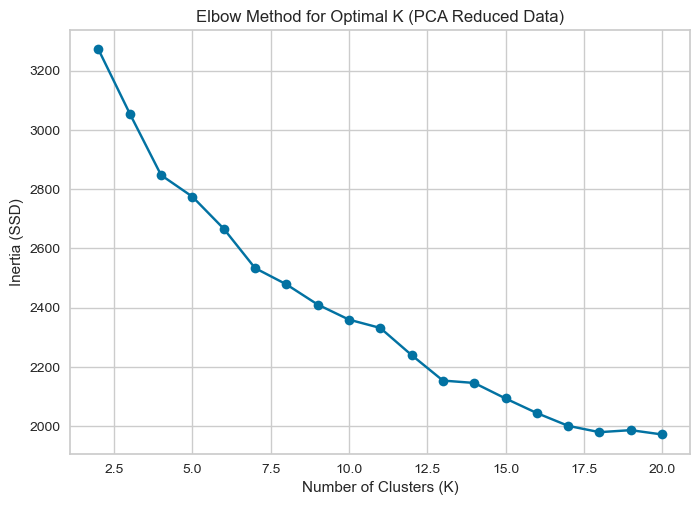

['kmean_model.joblib']

In [369]:
# List to store the sum of squared errors (inertia) for each K
ssd = []  

for k in range(2, 21):  # Testing K values from 2 to 20
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=25)
    kmeans.fit(X_cleaned)
    ssd.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(2, 21), ssd, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (SSD)')
plt.title('Elbow Method for Optimal K (PCA Reduced Data)')
plt.savefig("elbow_method_plot.png", dpi=300, bbox_inches='tight')
plt.show()

# Save the model to a file
joblib.dump(kmeans, 'kmean_model.joblib')

- The biggest drop happens between K = 14

- After removing the outliers then applied the k-mean without outliers. the best K came out to be 14

In [300]:
# Best k value
kmeans = KMeans(n_clusters=14, init='k-means++', random_state=42)
kmeans.fit(X_cleaned)

kmean_labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Using Silhouette_score to find out the scores  of K value clustering
# Compute Silhouette Score
score = silhouette_score(X_cleaned, kmean_labels)
print("Silhouette Score:", score)


Silhouette Score: 0.10073141230997629


C:\Users\Masoum Saberi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Kmean Silhouette Score: 0.07697793562726221  K=14

after outliers have been removed.

Kmean Silhouette Score: 0.10073141230997629  K=14

C:\Users\Masoum Saberi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Masoum Saberi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Masoum Saberi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Masoum Saberi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known

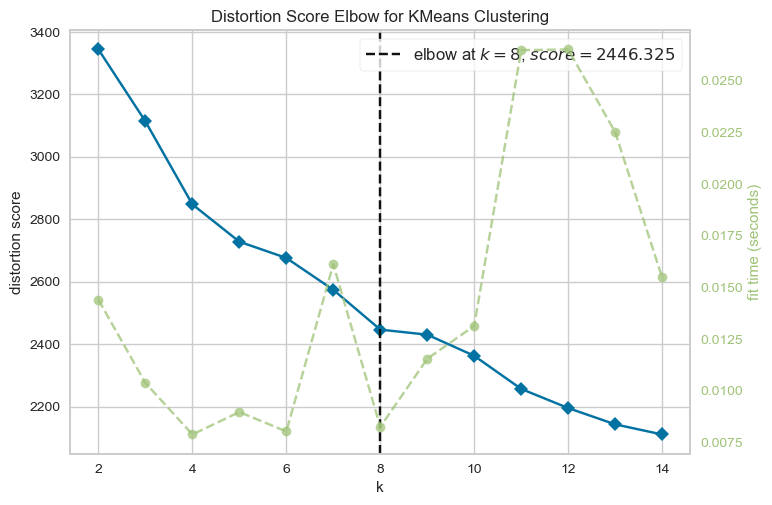

<Figure size 800x600 with 0 Axes>

In [303]:
# Create the Elbow Visualizer for max number of 14 clusters
Elbow_M = KElbowVisualizer(KMeans(), k=14)

# Fit on X
Elbow_M.fit(X_cleaned)

Elbow_M.show();

fig = plt.figure(figsize=(8, 6))
plt.savefig("ElbowVisualizer_plot.png", dpi=300, bbox_inches='tight')
plt.show()


In [286]:
# figure out each cluster's proportion of <30 day readmissions with cluster K=14
df['cluster'] = kmean_labels
for cluster_id in range(14):
    cluster_data = df[df["cluster"] == cluster_id]
    cluster_size = len(cluster_data)
    print(cluster_data.iloc[:,:10])
    readmit_30 = cluster_data[cluster_data["readmitted"] == "<30"]
    readmit_30_count = len(readmit_30)
    proportion_30 = readmit_30_count / cluster_size if cluster_size > 0 else 0
    print(f"Cluster {cluster_id}: size={cluster_size}, <30 day readmissions={readmit_30_count} ({proportion_30:.2%})")
    cluster_data.iloc[:,:10]

                   race  gender       age     weight  time_in_hospital  \
2636          Caucasian  Female   [70-80)    [50-75)                 6   
2725          Caucasian  Female   [80-90)    [25-50)                 5   
2960          Caucasian    Male   [50-60)  [100-125)                 3   
3212          Caucasian  Female  [90-100)    [50-75)                 6   
3226          Caucasian    Male   [50-60)    [25-50)                 4   
...                 ...     ...       ...        ...               ...   
101040        Caucasian  Female   [70-80)    [50-75)                 3   
101079        Caucasian    Male   [80-90)    [50-75)                 3   
101131        Caucasian  Female   [80-90)    [50-75)                 5   
101196  AfricanAmerican  Female   [70-80)    [50-75)                 1   
101456  AfricanAmerican    Male   [60-70)   [75-100)                 2   

        num_lab_procedures  num_procedures  num_medications  \
2636                    11               1      

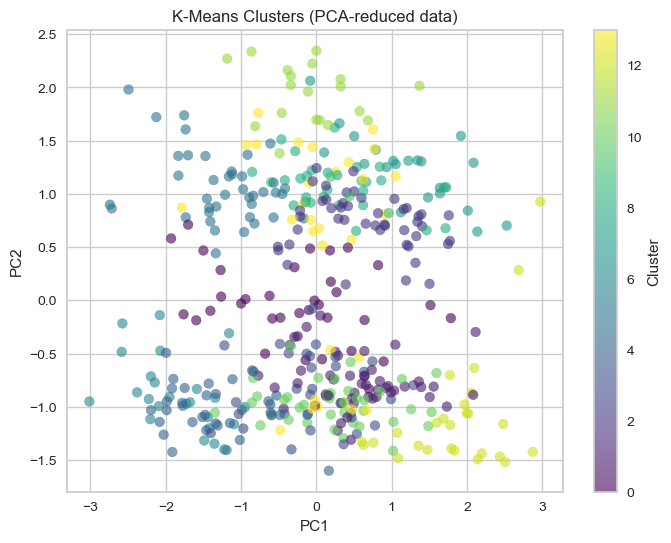

In [302]:
from sklearn.decomposition import PCA

# for 2D visualization
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_cleaned)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmean_labels, cmap='viridis', alpha=0.6)
plt.title("K-Means Clusters (PCA-reduced data)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster")
plt.savefig("Kmean_plot.png", dpi=300, bbox_inches='tight')
plt.show()


### Summary of Clustering Results

The clustering analysis produced the following clusters:
| Cluster | Size | <30 Day Readmissions | Readmission Rate |
|---------|------|----------------------|------------------|
| 0       | 593  | 50                   | 8.43%            |
| 1       | 440  | 55                   | 12.50%           |
| 2       | 111  | 31                   | 27.93%           |
| 3       | 3    | 1                    | 33.33%           |
| 4       | 210  | 26                   | 12.38%           |
| 5       | 214  | 21                   | 9.81%            |
| 6       | 105  | 11                   | 10.48%           |
| 7       | 2    | 1                    | 50.00%           |
| 8       | 146  | 14                   | 9.59%            |
| 9       | 302  | 11                   | 3.64%            |
| 10      | 1    | 0                    | 0.00%            |
| 11      | 14   | 1                    | 7.14%            |
| 12      | 29   | 2                    | 6.90%            |
| 13      | 390  | 54                   | 13.85%           |


## Patient Cluster Characteristics

Based on the clustering results, here are some high-level features on the patient characteristics in each cluster:

- **Cluster 0:**  
  - **Demographics:** Mostly Caucasian with a mix of genders 
  - **Age & Weight:** Patients aged between ~50–80, commonly with weight in the [75–100) range  
  - **Hospital Stay:** Moderate length of stay (3–6 days)

- **Cluster 1:**  
  - **Demographics:** Mostly Caucasian with some patients in their 20s  
  - **Hospital Stay:** Generally around 1–12 days stay

- **Cluster 2 & 3:**  
  - **Demographics:** Older patients with higher readmission rates (up to 27–33%).  
  - **Clinical Notes:** These clusters may require closer follow-up given the increased risk of readmission.

- **Cluster 4:**  
  - **Demographics:** Older population with varied weight ranges and moderate hospital stays.  
  - **Observations:** Shows a balanced mix of lab and procedural counts.

- **Clusters 5–15:**  
  - **Variations:** These clusters differentiate further based on subtle demographic and clinical nuances (e.g., length of stay, outpatient visits, and medication counts) with readmission rates ranging from as low as 0% (Cluster 10) to 50% (Cluster 7).  
  - **Note:** Some clusters are very small (e.g., Cluster 3, Cluster 7) and might represent outlier groups.